<a href="https://www.kaggle.com/code/sagardeepdas/cnn-herbal-det?scriptVersionId=205322890" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ***The dataset to be used in kaggle input needs to be downloaded first in either .csv format or as raw files.***

# CNN based classification of Indian herbal plant species

## 1. Importing Libraries

In [4]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

## 2. Data Preprocessing and Augmentation

In [5]:
preprocess = ImageDataGenerator(rescale = 1./255, validation_split = 0.2, rotation_range = 20, width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True)

In [6]:
train_data = preprocess.flow_from_directory('/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database', target_size = (150, 150), batch_size = 32, class_mode = 'categorical', subset = 'training')
val_data = preprocess.flow_from_directory('/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database', target_size = (150, 150), batch_size = 32, class_mode = 'categorical', subset = 'validation')

Found 3041 images belonging to 50 classes.
Found 736 images belonging to 50 classes.


In [7]:
#important to save the class file for leaf names
class_indices = train_data.class_indices
np.save('class_names.npy', class_indices)

In [8]:
num_classes = train_data.num_classes

## 3. Building the CNN model

In [9]:
model = Sequential([
    Input(shape = (150,150, 3)),
    Conv2D(32, (3, 3), activation = 'relu'), MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'), MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation = 'relu'), MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation = 'softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

## 4. Training the model

In [11]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)
history = model.fit(train_data, epochs = 30, validation_data=val_data, callbacks = [early_stopping])

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730783649.117842     122 service.cc:145] XLA service 0x7ba56c001eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730783649.117904     122 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730783649.117909     122 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/96 ━━━━━━━━━━━━━━━━━━━━ 18:46 12s/step - accuracy: 0.0312 - loss: 3.9090 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1730783654.921465     122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 668ms/step - accuracy: 0.0549 - loss: 3.8636 - precision: 0.3590 - recall: 0.0033 - val_accuracy: 0.1291 - val_loss: 3.3875 - val_precision: 0.8571 - val_recall: 0.0082
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 47s 467ms/step - accuracy: 0.1120 - loss: 3.2618 - precision: 0.4944 - recall: 0.0191 - val_accuracy: 0.2065 - val_loss: 2.7348 - val_precision: 0.6286 - val_recall: 0.0299
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 469ms/step - accuracy: 0.2184 - loss: 2.7407 - precision: 0.5800 - recall: 0.0512 - val_accuracy: 0.1984 - val_loss: 2.5537 - val_precision: 0.6500 - val_recall: 0.0530
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 49s 477ms/step - accuracy: 0.2902 - loss: 2.4120 - precision: 0.6304 - recall: 0.0915 - val_accuracy: 0.3899 - val_loss: 2.0777 - val_precision: 0.6835 - val_recall: 0.1291
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 49s 477ms/step - accuracy: 0.4171 - loss: 1.9517 - precision: 0.6802 - recall: 0.2109 - val_accuracy: 0.4565 - val_loss: 1.8737 -

## 5. Displaying the model evaluation metrics

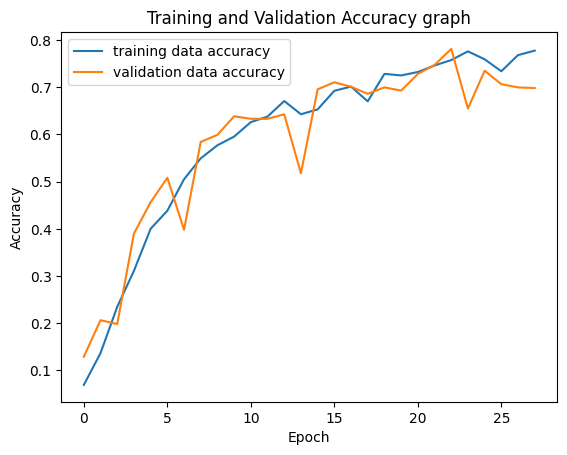

In [12]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='training data accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation data accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy graph')
plt.show()

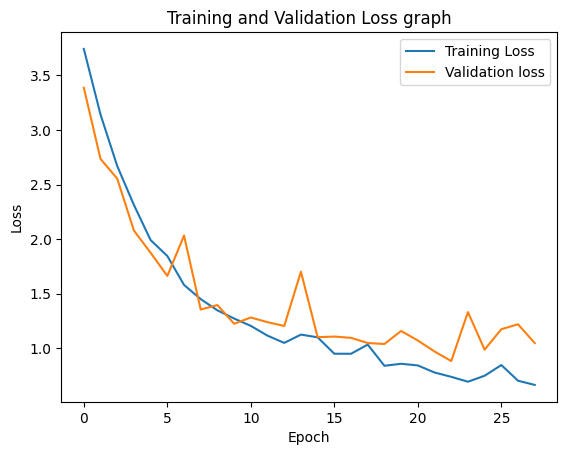

In [13]:
#Plot loss
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss graph')
plt.show()

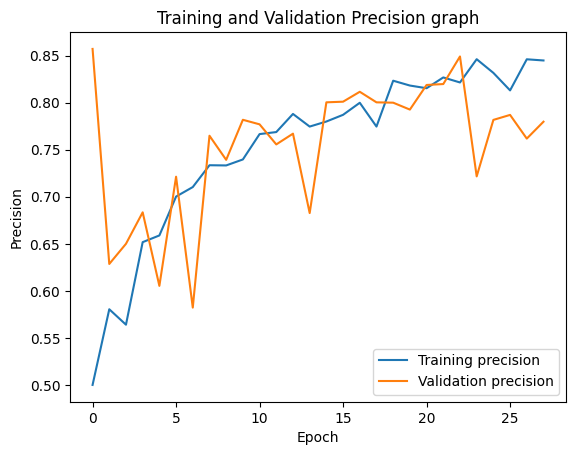

In [15]:
#Plot precision
plt.plot(history.history['precision'], label = 'Training precision')
plt.plot(history.history['val_precision'], label = 'Validation precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Training and Validation Precision graph')
plt.show()

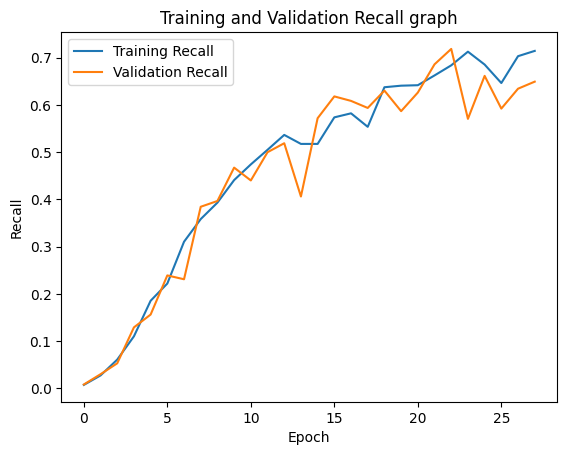

In [16]:
#Plot recall 
plt.plot(history.history['recall'], label = 'Training Recall')
plt.plot(history.history['val_recall'], label = 'Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Training and Validation Recall graph')
plt.show()

## 6. Saving the model

In [ ]:
model.save('CNN_model.h5')

## 7. Load and Use the model

In [ ]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0 
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

img_path = 'sample_leaf.jpg'  # Replace with your image path
processed_image = load_and_preprocess_image(img_path)

predictions = model.predict(processed_image)
predicted_class_index = np.argmax(predictions[0]) 